In [1]:
import dicom
import os
import pandas as pd

data_dir ="D:/stage1/"
patients = os.listdir(data_dir)
labels_df = pd.read_csv('D:/stage1_labels.csv',index_col=0)

#labels_df.head()

for patient in patients[:2]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path +'/' +s)for s in os.listdir(path)]
    slices.sort(key= lambda x: int(x.ImagePositionPatient[2]))
    print("patient ID: ",patient,"\nNo of Slices: ",len(slices),"\nCancer Status: ",label)
    print ("Dimentions: ",slices[0].pixel_array.shape,'\n')    

C:\Users\hunbl\Anaconda3\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


patient ID:  0015ceb851d7251b8f399e39779d1e7d 
No of Slices:  195 
Cancer Status:  1
Dimentions:  (512, 512) 

patient ID:  0030a160d58723ff36d73f41b170ec21 
No of Slices:  265 
Cancer Status:  0
Dimentions:  (512, 512) 



patient ID:  0015ceb851d7251b8f399e39779d1e7d


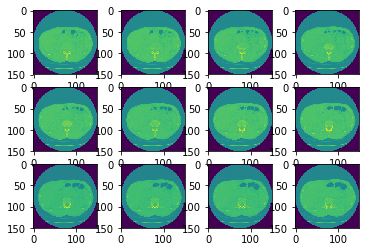

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
#pip install opencv-python

IMG_PX_SIZE = 150

for patient in patients[:1]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path +'/' +s)for s in os.listdir(path)]
    slices.sort(key= lambda x: int(x.ImagePositionPatient[2]))
    
    fig =  plt.figure()
    print("patient ID: ",patient)
    
    for num,each_slice in enumerate(slices[12:24]):
        y= fig.add_subplot(3,4,num+1)
        new_image = cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE))
        plt.imshow(new_image)
    plt.show()

import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
#pip install opencv-python

IMG_PX_SIZE = 64
HM_SLICES = 64

def chunks(l,n):
    for i in range (0, len(l),n):
        yield l[i:i+n]

def mean(l):
    return sum(l)/len(l)

for patient in patients[:10]:
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path +'/' +s)for s in os.listdir(path)]
    slices.sort(key= lambda x: int(x.ImagePositionPatient[2]))

    new_slices =[]
    
    slices = [cv2.resize(np.array(each_slice.pixel_array),(IMG_PX_SIZE,IMG_PX_SIZE)) for each_slice in slices]
    
    chunk_sizes = math.ceil(len(slices)/HM_SLICES)
    
    for slices_chunk in chunks(slices,chunk_sizes):
        slices_chunk= list(map(mean,zip(*slices_chunk)))
        new_slices.append(slices_chunk)
        
    if len(new_slices) == HM_SLICES-1:
        new_slices.append(new_slices[-1])
        
    if len(new_slices) == HM_SLICES-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == HM_SLICES+2:
        new_val = list(map(mean,zip(*[new_slices[HM_SLICES-1]],new_slices[HM_SLICES])))
        del new_slices[HM_SLICES]
        new_slices[HM_SLICES-1]*new_val
        
    if len(new_slices) == HM_SLICES+1:
        new_val = list(map(mean,zip(*[new_slices[HM_SLICES-1]],new_slices[HM_SLICES])))
        del new_slices[HM_SLICES]
        new_slices[HM_SLICES-1]*new_val
        
    print("patient ID: ",patient)        
    print("Slices Length: ",len(new_slices))

    fig=plt.figure()
    for num,each_slice in enumerate(new_slices):
        y= fig.add_subplot(4,5,num+1)
        plt.imshow(each_slice)
    plt.show()
    

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
#pip install opencv-python

IMG_PX_SIZE = 32
HM_SLICES = 32

def chunks(l,n):
    for i in range (0, len(l),n):
        yield l[i:i+n]

def mean(l):
    return sum(l)/len(l)

def process_data(patient, label_df, img_px_size=50, hm_slices=20,visualize=False):
    label = labels_df.get_value(patient, 'cancer')
    path = data_dir + patient
    slices = [dicom.read_file(path +'/' +s)for s in os.listdir(path)]
    slices.sort(key= lambda x: int(x.ImagePositionPatient[2]))

    new_slices =[]
    
    slices = [cv2.resize(np.array(each_slice.pixel_array),(img_px_size,img_px_size)) for each_slice in slices]
    
    chunk_sizes = math.ceil(len(slices)/hm_slices)
    
    for slices_chunk in chunks(slices,chunk_sizes):
        slices_chunk= list(map(mean,zip(*slices_chunk)))
        new_slices.append(slices_chunk)
        
    if len(new_slices) == hm_slices-1:
        new_slices.append(new_slices[-1])
        
    if len(new_slices) == hm_slices-2:
        new_slices.append(new_slices[-1])
        new_slices.append(new_slices[-1])

    if len(new_slices) == hm_slices+2:
        new_val = list(map(mean,zip(*[new_slices[hm_slices-1]],new_slices[hm_slices])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1]*new_val
        
    if len(new_slices) == hm_slices+1:
        new_val = list(map(mean,zip(*[new_slices[hm_slices-1]],new_slices[hm_slices])))
        del new_slices[hm_slices]
        new_slices[hm_slices-1]*new_val
        
#print("patient ID: ",patient)
    if(visualize):      
        print("Slices Length: ",len(new_slices))
        fig=plt.figure()
        for num,each_slice in enumerate(new_slices):
            y= fig.add_subplot(4,5,num+1)
            plt.imshow(each_slice)
        plt.show()
    
    if label == 1: label = np.array([0,1])
    elif label == 0 : label = np.array([1,0])
        
    return np.array(new_slices),label

much_data=[]
 
for num,patient in enumerate(patients):
    print(num,patient)
    try:
        img_data,label = process_data(patient,labels_df, img_px_size=IMG_PX_SIZE, hm_slices=HM_SLICES)
        much_data.append([img_data, label,patient])
    except KeyError as e:
        print ("This is unlabeled Data")
        
np.save('F:/muchdata-{}-{}-{}-{}.npy'.format('stage1',IMG_PX_SIZE,IMG_PX_SIZE, HM_SLICES),much_data)

0 0015ceb851d7251b8f399e39779d1e7d
1 0030a160d58723ff36d73f41b170ec21
2 003f41c78e6acfa92430a057ac0b306e
3 006b96310a37b36cccb2ab48d10b49a3
4 008464bb8521d09a42985dd8add3d0d2
5 0092c13f9e00a3717fdc940641f00015
6 00986bebc45e12038ef0ce3e9962b51a
7 00cba091fa4ad62cc3200a657aeb957e
8 00edff4f51a893d80dae2d42a7f45ad1
9 0121c2845f2b7df060945b072b2515d7
10 013395589c01aa01f8df81d80fb0e2b8
11 01de8323fa065a8963533c4a86f2f6c1
12 01e349d34c06410e1da273add27be25c
13 01f1140c8e951e2a921b61c9a7e782c2
14 024efb7a1e67dc820eb61cbdaa090166
15 0257df465d9e4150adef13303433ff1e
16 026470d51482c93efc18b9803159c960
This is unlabeled Data
17 0268f3a7a17412178cfb039e71799a80
18 026be5d5e652b6a7488669d884ebe297
19 02801e3bbcc6966cb115a962012c35df
20 028996723faa7840bb57f57e28275e4c
21 031b7ec4fe96a3b035a8196264a8c8c3
This is unlabeled Data
22 0334c8242ce7ee1a6c1263096e4cc535
23 03bd22ed5858039af223c04993e9eb22
This is unlabeled Data
24 03fb0d0fdb187ee1160f09386b28c3f2
25 03ff23e445787886f8b0cb192b3c154d
26 04

In [40]:
src = 'd:/'
dstTrue = 'd:/WithCancer/'
dstFalse = 'd:/WithOutCance/'

if not os.path.exists(dstTrue):
    os.makedirs(dstTrue)
if not os.path.exists(dstFalse):
    os.makedirs(dstFalse)
    
tempAdd='go_inside'
os.rename(src+tempAdd, dstTrue+tempAdd,src_dir_fd=None, dst_dir_fd=None)
tempAdd='go_outside'
os.rename(src+tempAdd, dstFalse+tempAdd,src_dir_fd=None, dst_dir_fd=None)

In [9]:
import os
import pandas as pd

#the folder where all the "City Scan Folders" are kept
#be carefull with the path because process is ireversible 
data_dir ="D:/stage1/"
patients = os.listdir(data_dir)
labels_df = pd.read_csv('D:/stage1_labels.csv',index_col=0)

#creating three folders
#be carefull with the path because process is ireversible 
dstTrue = 'd:/stage1/WithCancer/'
dstFalse = 'd:/stage1/WithOutCancer/'
dstNeutral = 'd:/stage1/NotSure/'

#creating folders if not present already
if not os.path.exists(dstTrue):
    os.makedirs(dstTrue)
if not os.path.exists(dstFalse):
    os.makedirs(dstFalse)
if not os.path.exists(dstNeutral):
    os.makedirs(dstNeutral)

c1=0
c2=0
c3=0
for patient in patients[:]:
    try:
        label = labels_df.get_value(patient, 'cancer')
    except KeyError as e:
        label=3
        if(patient!='NotSure' or patient!='WithOutCancer' or patient!='WithCancer'):
            label=4
            
    if(label==1):
        c1=c1+1
        print(data_dir+patient +" --> "+dstTrue+patient)
        os.rename(data_dir+patient, dstTrue+patient,src_dir_fd=None, dst_dir_fd=None)
    elif(label==0):
        c2=c2+1
        print(data_dir+patient +" --> "+dstFalse+patient)
        os.rename(data_dir+patient, dstFalse+patient,src_dir_fd=None, dst_dir_fd=None)
    elif(label==3):
        c3=c3+1
        print(data_dir+patient +" --> "+dstNeutral+patient)
        os.rename(data_dir+patient, dstNeutral+patient,src_dir_fd=None, dst_dir_fd=None)

print("With Cancer = "+str(c1))
print("With Out Cancer = "+str(c2))
print("Not Sure = "+str(c3))


With Cancer = 0
With Out Cancer = 0
Not Sure = 0


In [8]:
import pandas as pd
labels_df = pd.read_csv('D:/stage1_labels.csv',index_col=0)

In [31]:
print([labels_df.index[i] for i in range(15)])

['0015ceb851d7251b8f399e39779d1e7d', '0030a160d58723ff36d73f41b170ec21', '003f41c78e6acfa92430a057ac0b306e', '006b96310a37b36cccb2ab48d10b49a3', '008464bb8521d09a42985dd8add3d0d2', '0092c13f9e00a3717fdc940641f00015', '00986bebc45e12038ef0ce3e9962b51a', '00cba091fa4ad62cc3200a657aeb957e', '00edff4f51a893d80dae2d42a7f45ad1', '0121c2845f2b7df060945b072b2515d7', '013395589c01aa01f8df81d80fb0e2b8', '01de8323fa065a8963533c4a86f2f6c1', '01e349d34c06410e1da273add27be25c', '01f1140c8e951e2a921b61c9a7e782c2', '024efb7a1e67dc820eb61cbdaa090166']


In [2]:
import numpy as np
much_data = np.load('muchdata-50-50-20.npy')

In [3]:
print (much_data.shape)

(1397, 3)


In [10]:
if (much_data.shape==(1397, 3)):
    print('ture')
else:
    print('false')

ture
